In [1]:
from pathlib import Path
import glob
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D

import scienceplots


SINGLE_COL_WIDTH = 3.5
DOUBLE_COL_WIDTH = 7.16
DPI = 150

plt.style.use(["science", "ieee"])
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

ref_style = {
    "linestyle": "--",
    "color": "black",
    "alpha": 0.7,
    "linewidth": 1.0,
    "label": "ED Reference",
}

# use the color palette manually, since importing seaborn overrides the paper styles
SB_COLORBLIND = [
    "#0173b2",
    "#de8f05",
    "#029e73",
    "#d55e00",
    "#cc78bc",
    "#ca9161",
    "#fbafe4",
    "#949494",
    "#ece133",
    "#56b4e9",
]

main_style = {
    "linestyle": "-",
    "linewidth": 1.0,
    "alpha": 0.9,
    "marker": "o",
    "markersize": 3,
    "markeredgewidth": 0.0,
    "color": SB_COLORBLIND[0],
}

SUPPORT_GUIDE_LS = (0, (1.5, 2.8))  # a bit finer than (2,2)
SUPPORT_GUIDE_LW = 0.75            # thinner
SUPPORT_GUIDE_A  = 0.30            # more transparent
SUPPORT_GUIDE_C  = "0.20"          # slightly lighter gray
SUPPORT_LABEL_A  = 1.0
SUPPORT_LABEL_T = r"Support $g$"

print("Global styles defined.")

Global styles defined.


In [26]:
# --- Load Data Plot 1 ---
file_path = Path("tfim_4x4_suscept_rbm_mc_20251216_010908.csv")
ref_file = Path("tfim_4x4_suscept_ref.csv")

if file_path.exists():
    df = pd.read_csv(file_path)
    h_eval = df["h"].values
    chi_values = df["chi_F"].values
else:
    # Dummy data
    h_eval = np.linspace(1, 4, 20)
    chi_values = np.exp(-(h_eval-2.5)**2)

ref_df = pd.read_csv(ref_file) if ref_file.exists() else None
XLIM = (0.95, 4.05)
print("Data for Plot 1 loaded.")

Data for Plot 1 loaded.


Saved: tfim_4x4_susceptibility_narrow.svg


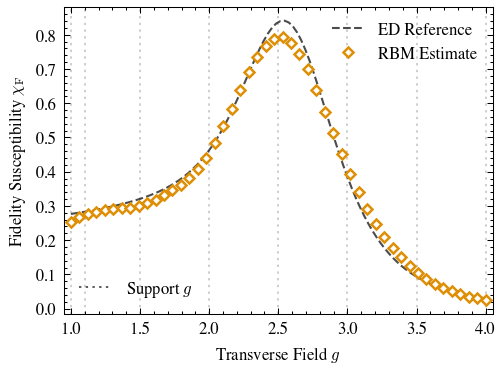

In [27]:
# =========================
# Cell 3 - Fidelity susceptibility (narrow)
# =========================
SAVE_FIG = True
FILENAME = "tfim_4x4_susceptibility_narrow.svg"
COLUMN_MODE = "single"

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- marker style (open diamond) ---
MARKER_SHAPE = "D"
MARKER_SIZE  = 3.3
MARKER_EDGE  = 1.2

# --- main color: use your frozen seaborn-free palette (orange) ---
MAIN_COLOR = SB_COLORBLIND[1]

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# helps keep guides visible but still behind data
ax.patch.set_zorder(0)

# 1) Reference curve (MATCH global ref_style exactly)
if ref_df is not None and len(ref_df) > 0:
    _ref = dict(ref_style)
    _ref.pop("label", None)  # set label explicitly
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        label="ED Reference",
        zorder=1,
        **_ref,
    )

# 2) RBM estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE,
    markersize=MARKER_SIZE,
    color=MAIN_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE,
    label="RBM Estimate",
    zorder=2,
)

# 3) Support lines (vertical guides) - use GLOBAL support styling
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{F}$")

if XLIM is not None:
    ax.set_xlim(*XLIM)

# --- split legends (support bottom-left, proxy artist with GLOBAL styling) ---
leg_main = ax.legend(loc="upper right", frameon=False)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
    label=SUPPORT_LABEL_T,
)
leg_support = ax.legend(handles=[support_handle], loc="lower left", frameon=False)
ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()